In [1]:
# Artificial Neural Network
# Installing Keras
# Enter the following command in a terminal (or anaconda prompt for Windows users): 
#conda install -c conda-forge keras
# Part 1 - Data Preprocessing
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
import keras
keras.__version__

2023-11-04 16:47:54.479441: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


VOC-NOTICE: GPU memory for this assignment is capped at 1024MiB


2023-11-04 16:47:57.013461: E tensorflow/compiler/xla/stream_executor/cuda/cuda_driver.cc:268] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected


'2.13.1'

In [3]:
dataset = pd.read_csv('Churn_Modelling.csv')
X = dataset.iloc[:, 3:13]
y = dataset.iloc[:, 13]

In [4]:
dataset.tail()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1
9999,10000,15628319,Walker,792,France,Female,28,4,130142.79,1,1,0,38190.78,0


In [5]:
#Create dummy variables
geography=pd.get_dummies(dataset["Geography"],drop_first=True)
gender=pd.get_dummies(dataset['Gender'],drop_first=True)

In [6]:
gender

,Male
0,0
1,0
2,0
3,0
4,0
...,...
9995,1
9996,1
9997,0
9998,1


In [7]:
## Concatenate the Data Frames
X=pd.concat([X,geography,gender],axis=1)

In [8]:
## Drop Unnecessary columns
X=X.drop(['Geography','Gender'],axis=1)

In [9]:
X.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Germany,Spain,Male
0,619,42,2,0.00,1,1,1,101348.88,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,1,0


In [10]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [11]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [12]:
X_train[0]

array([ 0.16958176, -0.46460796,  0.00666099, -1.21571749,  0.8095029 ,
        0.64259497, -1.03227043,  1.10643166, -0.5698444 ,  1.74309049,
       -1.09168714])

In [14]:
# Importing the Keras libraries and packages
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LeakyReLU,PReLU,ELU
from keras.layers import Dropout

In [23]:
# Initialising the ANN
classifier = Sequential()

In [24]:
# Adding the input layer and the first hidden layer
classifier.add(Dense(6, kernel_initializer = 'he_uniform',activation='relu',input_dim = 11))

In [25]:
classifier.add(Dropout(0.3))

In [26]:
# Adding the second hidden layer
classifier.add(Dense(6, kernel_initializer = 'he_uniform',activation='relu'))

In [27]:
# Adding the second hidden layer
classifier.add(Dense(6, kernel_initializer = 'he_uniform',activation='relu'))

In [28]:
classifier.add(Dropout(0.3))

In [29]:
# Adding the second hidden layer
classifier.add(Dense(6, kernel_initializer = 'he_uniform',activation='relu'))

In [30]:
classifier.add(Dropout(0.3))

In [31]:
# Adding the output layer
classifier.add(Dense(1, kernel_initializer = 'glorot_uniform', activation = 'sigmoid'))

In [32]:
# Compiling the ANN
classifier.compile(optimizer = 'Adamax', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [33]:
len(X_train)

8000

In [34]:
# Fitting the ANN to the Training set
model_history=classifier.fit(X_train, y_train,validation_split=0.13, batch_size = 2, epochs = 10)

Epoch 1/10
3480/3480 [==============================] - 5s 1ms/step - loss: 0.5813 - accuracy: 0.7618 - val_loss: 0.5117 - val_accuracy: 0.7981
Epoch 2/10
3480/3480 [==============================] - 4s 1ms/step - loss: 0.5275 - accuracy: 0.7931 - val_loss: 0.4985 - val_accuracy: 0.7981
Epoch 3/10
3480/3480 [==============================] - 4s 1ms/step - loss: 0.5141 - accuracy: 0.7954 - val_loss: 0.4928 - val_accuracy: 0.7981
Epoch 4/10
3480/3480 [==============================] - 4s 1ms/step - loss: 0.5035 - accuracy: 0.7957 - val_loss: 0.4865 - val_accuracy: 0.7981
Epoch 5/10
3480/3480 [==============================] - 4s 1ms/step - loss: 0.4994 - accuracy: 0.7955 - val_loss: 0.4823 - val_accuracy: 0.7981
Epoch 6/10
3480/3480 [==============================] - 4s 1ms/step - loss: 0.4961 - accuracy: 0.7955 - val_loss: 0.4762 - val_accuracy: 0.7981
Epoch 7/10
3480/3480 [==============================] - 4s 1ms/step - loss: 0.4894 - accuracy: 0.7957 - val_loss: 0.4698 - val_accuracy:

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


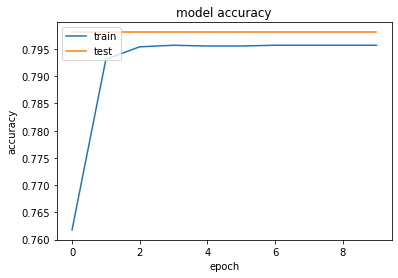

In [35]:
# list all data in history

print(model_history.history.keys())
# summarize history for accuracy
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

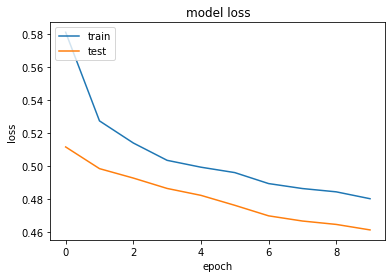

In [36]:
# summarize history for loss
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()


In [37]:
# Part 3 - Making the predictions and evaluating the model

# Predicting the Test set results
y_pred = classifier.predict(X_test)
y_pred = (y_pred > 0.5)

63/63 [==============================] - 0s 791us/step


In [38]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[1595,    0],
       [ 405,    0]])

In [39]:
# Calculate the Accuracy
from sklearn.metrics import accuracy_score
score=accuracy_score(y_pred,y_test)
score

0.7975

In [40]:
classifier.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 6)                 72        
                                                                 
 dropout (Dropout)           (None, 6)                 0         
                                                                 
 dense_5 (Dense)             (None, 6)                 42        
                                                                 
 dense_6 (Dense)             (None, 6)                 42        
                                                                 
 dropout_1 (Dropout)         (None, 6)                 0         
                                                                 
 dense_7 (Dense)             (None, 6)                 42        
                                                                 
 dropout_2 (Dropout)         (None, 6)                